# 리딩롤배우 테이블과 박스오피스 테이블 붙이기 (merge)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
warnings.filterwarnings('ignore')

In [2]:
lead = pd.read_csv('../01.Data_Collection/actor_leading_role.csv')
box = pd.read_csv('../01.Data_Collection/boxoffice.csv')

In [3]:
lead.head()

,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
0,서도철,20148048,베테랑,황정민,배우,10090290,남자
1,안옥윤,20148851,암살,전지현,배우,10061467,여자
2,안상구,20149314,내부자들,이병헌,배우,10055626,남자
3,NaN,20145503,검은 사제들,김윤석,배우,10005276,남자
4,NaN,20148846,사도,송강호,배우,10037018,남자


In [4]:
sex = lead['sex'].value_counts()
sex

남자    501
여자    269
Name: sex, dtype: int64

In [5]:
sex_proportion = (sex/len(lead)).reset_index()
sex_proportion

,index,sex
0,남자,0.650649
1,여자,0.349351


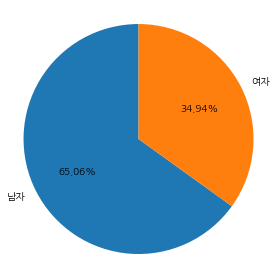

In [6]:
labels = sex_proportion['index']
sizes = sex_proportion['sex']

fig1, ax1 = plt.subplots(figsize=(4,4))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [7]:
box.head(3)

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,55,워킹걸,2015.1.7,"1,183,887,479",0.1%,"1,201,963,479","149,181","151,550",308,"7,076",한국,한국,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,청소년관람불가,"코미디,멜로/로맨스",정범식,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬..."
1,121,설해,2015.1.8,"20,767,500",0.0%,"29,770,500","2,796","3,933",34,335,한국,한국,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",12세이상관람가,"멜로/로맨스,드라마",김정권,"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재..."
2,26,허삼관,2015.1.14,"7,408,943,569",0.8%,"7,408,943,569","955,679","955,679",621,"27,645",한국,한국,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),12세이상관람가,드라마,하정우,"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균..."


In [8]:
len(box)

802

In [9]:
len(lead)

770

In [10]:
# 박스오피스 테이블 안에 같은 제목을 가진 영화는 없다.
box['영화명'].nunique()

802

In [11]:
# 리딩롤 테이블 안에도 같은 제목을 가진 영화가 없다.
lead['movieNm'].nunique()

770

## 영화명으로 merge 

In [12]:
merged = box.merge(lead, how='left', left_on='영화명', right_on='movieNm')

In [13]:
merged.head(1)

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
0,55,워킹걸,2015.1.7,"1,183,887,479",0.1%,"1,201,963,479","149,181","151,550",308,"7,076",한국,한국,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,청소년관람불가,"코미디,멜로/로맨스",정범식,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",NaN,20147947.0,워킹걸,조여정,배우,10066680.0,여자


In [14]:
merged.isnull().sum()

순위             0
영화명            0
개봉일            0
매출액            0
매출액점유율         0
누적매출액          0
관객수            0
누적관객수          0
스크린수           0
상영횟수           0
대표국적           0
국적             0
제작사           20
배급사            1
등급             0
장르             0
감독             3
배우            31
cast         462
movieCd       60
movieNm       60
peopleNm      60
repRoleNm     60
peopleCd      60
sex           60
dtype: int64

left merge를 했으므로 'movieNm' 결측치가 32개(len(box)-len(lead))여야 하는데 60개  
-> 박스오피스 데이터에 없는데 우리가 긁어온 데이터에는 있는 영화가 존재한다는 뜻. 대체 왜?

In [15]:
# outer merge를 해 보자.
outer_merged = box.merge(lead, how='outer', left_on='영화명', right_on='movieNm')

In [16]:
len(outer_merged)

830

In [17]:
outer_merged.isnull().sum()

순위            28
영화명           28
개봉일           28
매출액           28
매출액점유율        28
누적매출액         28
관객수           28
누적관객수         28
스크린수          28
상영횟수          28
대표국적          28
국적            28
제작사           48
배급사           29
등급            28
장르            28
감독            31
배우            59
cast         483
movieCd       60
movieNm       60
peopleNm      60
repRoleNm     60
peopleCd      60
sex           60
dtype: int64

In [18]:
# 리딩롤 테이블에만 있는 영화
outer_merged[outer_merged['영화명'].isnull()]['movieNm']

802                     태양을 쏴라 무삭제판
803                       위선자들: 감독판
804                    성난 화가 - 무삭제판
805                        용주골-무삭제판
806                       포장마차-무삭제판
807                 미궁: 비밀애 무삭제 특별판
808                       유부녀들(무삭제)
809                  내 친구의 아내 (무삭제)
810    나도 때론 포르노그라피의 주인공이고 싶다 : 감독판
811                        아가씨(확장판)
812             우리에게 떡볶이를 먹을 권리가 있다
813                            치킨게임
814                     하숙집 2 (무삭제)
815                            러브레따
816                개인교수: 심화학습 (무삭제)
817                    동거의 목적(무삭제판)
818                  뜨거운 이웃 무삭제 감독판
819                           문영 단편
820                     왕을 참하라 무삭제판
821                       비스티걸스 감독판
822                          덫 무삭제판
823                         군함도 감독판
824                     착한 형수 2 무삭제
825                          재혼의 기술
826                          오늘도 위위
827                        북간도의 십자가
828                  1919유관순-그녀들의조국
829                        8

In [19]:
# 박스오피스 테이블에만 있는 영화
outer_merged[outer_merged['movieNm'].isnull()]['영화명']

26                       태양을 쏴라
34          다이빙벨: 진실은 침몰하지 않습니다
36                      미궁: 비밀애
44                    잡식가족의 딜레마
59                        성난 화가
74                       밀양 아리랑
82                 에스엠타운 더 스테이지
108                        포장마차
111                        유부녀들
116                        오디세오
125                      울보 권투부
131      나도 때론 포르노그라피의 주인공이고 싶다
134                         용주골
144                        위선자들
146                    내 친구의 아내
147                      감금의 시간
150                      불안한 외출
161               나의 아들, 나의 어머니
164                       하숙집 2
168                       거미의 땅
172       극장판 꼬마버스 타요의 에이스 구출작전
175                      뜨거운 이웃
185                  개인교수: 심화학습
188                          귀향
195                    방 안의 코끼리
207                      동거의 목적
210                        입영전야
233                        드롭박스
238                         아가씨
242                       시선 사이
243                      소녀와 여자
246     

In [20]:
outer_merged[outer_merged['영화명']=='아가씨']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
238,11.0,아가씨,2016.6.1,"35,211,229,991",3.8%,"35,211,229,991","4,287,839","4,287,839","1,171","90,365",한국,한국,"유한회사 아가씨에프에스,(주)모호필름,(주)용필름",씨제이이앤엠(주),청소년관람불가,"스릴러,드라마",박찬욱,"김민희,김태리,하정우,조진웅,김해숙,문소리,최병모,김인우,이용녀,조은형,장한순,이규...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
outer_merged[outer_merged['movieNm']=='아가씨(확장판)']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,아가씨,20167301.0,아가씨(확장판),김민희,배우,10004236.0,여자


리딩롤의 영화명에는 확장판, 무삭제판, 감독판, 단편 같은 부연설명이 붙어 있고 박스오피스의 영화명에는 붙어 있지 않은 영화들이 있다.  

## leading_role.csv 의 'movieNm' 컬럼 값에 붙어있는 부연설명 제거

In [22]:
additional = outer_merged[outer_merged['영화명'].isnull()]['movieNm'].reset_index()

In [23]:
# 리딩롤에만 있고 박스오피스에는 없는 영화명 중 '확장'이 들어간 것의 개수
len(additional[additional['movieNm'].str.contains('확장')])

1

In [24]:
# 리딩롤 전체 영화명 중 '확장'이 들어간 것의 개수
len(lead[lead['movieNm'].str.contains('확장')])

2

In [25]:
# '확장' 붙은 것 중에 양쪽에 있어서 merge 된 것도 있다. (인천상륙작전)
lead[lead['movieNm'].str.contains('확장')]

,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
165,아가씨,20167301,아가씨(확장판),김민희,배우,10004236,여자
227,장학수,20160041,인천상륙작전 : 익스텐디드 에디션(확장판),이정재,배우,10057315,남자


In [26]:
# '아가씨'의 영화명만 부연설명을 뗀다.
lead.loc[165, 'movieNm'] = '아가씨'

In [27]:
lead.loc[165]

cast              아가씨
movieCd      20167301
movieNm           아가씨
peopleNm          김민희
repRoleNm          배우
peopleCd     10004236
sex                여자
Name: 165, dtype: object

In [28]:
# 리딩롤에만 있고 박스오피스에는 없는 영화명 중 '무삭제'가 들어간 것의 개수
len(additional[additional['movieNm'].str.contains('무삭제')])

14

In [29]:
# 리딩롤 전체 영화명 중 '무삭제'가 들어간 것의 개수
len(lead[lead['movieNm'].str.contains('무삭제')])

14

In [30]:
lead[lead['movieNm'].str.contains('무삭제')]

,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
67,NaN,20151582,태양을 쏴라 무삭제판,강지환,배우,10000877,남자
128,NaN,20152265,성난 화가 - 무삭제판,유준상,배우,10053981,남자
135,NaN,20161904,용주골-무삭제판,민도윤,배우,20223067,남자
139,NaN,20158463,포장마차-무삭제판,이채담,배우,20216887,여자
146,NaN,20151801,미궁: 비밀애 무삭제 특별판,김민기,배우,10004180,남자
147,NaN,20161882,유부녀들(무삭제),김소현,배우,20215546,여자
148,NaN,20162901,내 친구의 아내 (무삭제),정태민,배우,20160204,남자
276,NaN,20164697,하숙집 2 (무삭제),정넘쳐,배우,20208866,남자
292,NaN,20166912,개인교수: 심화학습 (무삭제),허예창,배우,20214447,남자
293,승구,20166652,동거의 목적(무삭제판),제동화,배우,20234386,남자


In [31]:
import re

In [32]:
# '무삭제'가 붙은 것은 모두 merge가 안 되었으므로 한꺼번에 부연설명을 뗀다.
lead['movieNm'] = lead['movieNm'].apply(lambda x: re.sub('.?무삭제.*', '', x).strip())

In [33]:
idxs = [67, 128, 135, 139, 146, 147, 148, 276, 292, 293, 301, 337, 387, 418]

In [34]:
lead.loc[idxs, 'movieNm']

67         태양을 쏴라
128       성난 화가 -
135           용주골
139          포장마차
146       미궁: 비밀애
147          유부녀들
148      내 친구의 아내
276         하숙집 2
292    개인교수: 심화학습
293        동거의 목적
301        뜨거운 이웃
337        왕을 참하라
387             덫
418       착한 형수 2
Name: movieNm, dtype: object

In [35]:
# 128번의 '-'를 뗀다.
lead.loc[128, 'movieNm'] = '성난 화가'

In [36]:
lead.loc[128, 'movieNm']

'성난 화가'

In [37]:
# 리딩롤에만 있고 박스오피스에는 없는 영화명 중 '감독판'이 들어간 것의 개수
len(additional[additional['movieNm'].str.contains('감독판')])

5

In [38]:
# 리딩롤 전체 영화명 중 '감독판'이 들어간 것의 개수
len(lead[lead['movieNm'].str.contains('감독판')])

4

In [39]:
additional[additional['movieNm'].str.contains('감독판')]

,index,movieNm
1,803,위선자들: 감독판
8,810,나도 때론 포르노그라피의 주인공이고 싶다 : 감독판
16,818,뜨거운 이웃 무삭제 감독판
19,821,비스티걸스 감독판
21,823,군함도 감독판


In [40]:
lead[lead['movieNm'].str.contains('감독판')]

,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
104,NaN,20163218,위선자들: 감독판,권민중,배우,10002374,여자
149,진희,20165441,나도 때론 포르노그라피의 주인공이고 싶다 : 감독판,한지은,배우,20238886,여자
386,NaN,20178127,비스티걸스 감독판,고은아,배우,10001724,여자
389,NaN,20177063,군함도 감독판,황정민,배우,10090290,남자


In [41]:
merged[merged['영화명']=='군함도']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
414,5,군함도,2017.7.26,"50,510,565,168",5.6%,"50,510,565,168","6,592,151","6,592,151","2,027","108,775",한국,한국,"(주)외유내강,(주)필름케이",씨제이이앤엠(주),15세이상관람가,"액션,드라마",류승완,"황정민,김규백,명인호,소지섭,송중기,이정현,김수안,지웅배,손용범,박상호,박선,박선주...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# 리딩롤에서 이미 영화명을 정리한 '뜨거운 이웃'을 제외하면 개수가 서로 맞으므로 모두 '감독판' 부연설명을 뗀다.
lead['movieNm'] = lead['movieNm'].apply(lambda x: x.replace(': 감독판', '').replace('감독판', '').strip())

In [43]:
lead.loc[[104, 149, 386, 389], 'movieNm']

104                      위선자들
149    나도 때론 포르노그라피의 주인공이고 싶다
386                     비스티걸스
389                       군함도
Name: movieNm, dtype: object

In [44]:
# 리딩롤에만 있고 박스오피스에는 없는 영화명 중 '단편'이 들어간 것의 개수
len(additional[additional['movieNm'].str.contains('단편')])

1

In [45]:
# 리딩롤 전체 영화명 중 '단편'이 들어간 것의 개수
len(lead[lead['movieNm'].str.contains('단편')])

1

In [46]:
lead[lead['movieNm'].str.contains('단편')]

,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
315,NaN,20158526,문영 단편,김태리,배우,20201026,여자


In [47]:
merged[merged['영화명']=='문영']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
336,98,문영,2017.1.12,"57,651,900",0.0%,"60,471,599","7,530","7,880",23,614,한국,한국,NaN,KT&G 상상마당 영화사업팀 컴퍼니에스에스(주),15세이상관람가,드라마,김소연,"김태리,정현,박완규,박정식",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# 리딩롤의 영화명에서 '단편'을 뗀다.
lead.loc[315, 'movieNm'] = '문영'
lead.loc[315]

cast              NaN
movieCd      20158526
movieNm            문영
peopleNm          김태리
repRoleNm          배우
peopleCd     20201026
sex                여자
Name: 315, dtype: object

## 다시 outer merge

In [49]:
outer_merged2 = box.merge(lead, how='outer', left_on='영화명', right_on='movieNm')
outer_merged2.isnull().sum()

순위             8
영화명            8
개봉일            8
매출액            8
매출액점유율         8
누적매출액          8
관객수            8
누적관객수          8
스크린수           8
상영횟수           8
대표국적           8
국적             8
제작사           28
배급사            9
등급             8
장르             8
감독            11
배우            39
cast         463
movieCd       40
movieNm       40
peopleNm      40
repRoleNm     40
peopleCd      40
sex           40
dtype: int64

In [50]:
# 제목 정리 전보다 결측치가 20개 감소. 나머지도 살펴보자.
outer_merged2[outer_merged2['영화명'].isnull()]['movieNm']

802    우리에게 떡볶이를 먹을 권리가 있다
803                   치킨게임
804                   러브레따
805                 재혼의 기술
806                 오늘도 위위
807               북간도의 십자가
808         1919유관순-그녀들의조국
809               82년생 김지영
Name: movieNm, dtype: object

In [51]:
outer_merged2[outer_merged2['movieNm'].isnull()]['영화명']

34          다이빙벨: 진실은 침몰하지 않습니다
44                    잡식가족의 딜레마
74                       밀양 아리랑
82                 에스엠타운 더 스테이지
116                        오디세오
125                      울보 권투부
147                      감금의 시간
150                      불안한 외출
161               나의 아들, 나의 어머니
168                       거미의 땅
172       극장판 꼬마버스 타요의 에이스 구출작전
188                          귀향
195                    방 안의 코끼리
210                        입영전야
233                        드롭박스
242                       시선 사이
243                      소녀와 여자
246                        보고싶다
257           극장판 프리즘스톤 올스타 셀렉션
269                     그림자들의 섬
272                      최악의 하루
279                     왕초와 용가리
292    극장판 프리파라 모두 모여라! 프리즘☆투어즈
298                무현, 두 도시 이야기
302                      시간의 종말
306                     오 마이 파파
393                      드래곤빌리지
401                      파란나비효과
412                    올 리브 올리브
413                      불온한 당신
441                  다시 태어나도 우리
455     

In [52]:
# 같은 영화인데 제목이 다르게 기입되어 merge 안 된 영화는 '1919 유관순' 뿐인 듯
outer_merged2[(outer_merged2['movieNm']=='1919유관순-그녀들의조국') | (outer_merged2['영화명']=='1919 유관순')]

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex
692,62.0,1919 유관순,2019.3.14,"506,367,410",0.1%,"506,367,410","61,938","61,938",269,"3,247",한국,한국,유관순문화산업전문유한회사,"주식회사 마운틴픽쳐스,케이티하이텔(주)",12세이상관람가,다큐멘터리,신상민,"이새봄,양윤희,김나니,박자희,장세아,하희라,김홍표",NaN,NaN,NaN,NaN,NaN,NaN,NaN
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20196881.0,1919유관순-그녀들의조국,이새봄,배우,20319176.0,여자


In [53]:
# 리딩롤의 'movieNm'을 박스오피스 '영화명'에 맞춰 변경한다.
lead[lead['movieNm']=='1919유관순-그녀들의조국'].index

Int64Index([702], dtype='int64')

In [54]:
lead.loc[702, 'movieNm'] = '1919 유관순'

## 다시 merge 해서 분석용 테이블 만들어 놓기

2차 전처리 때 해야할 일 : 박스오피스 테이블에만 있는 영화 39개, 리딩롤 테이블에만 있는 영화 7개의 정보를 직접 찾아서 채우기

In [59]:
outer_merged3 = box.merge(lead, how='outer', left_on='영화명', right_on='movieNm')
len(outer_merged3)

809

In [60]:
outer_merged3.isnull().sum()

순위             7
영화명            7
개봉일            7
매출액            7
매출액점유율         7
누적매출액          7
관객수            7
누적관객수          7
스크린수           7
상영횟수           7
대표국적           7
국적             7
제작사           27
배급사            8
등급             7
장르             7
감독            10
배우            38
cast         462
movieCd       39
movieNm       39
peopleNm      39
repRoleNm     39
peopleCd      39
sex           39
dtype: int64

In [71]:
# null 값을 '-'로 채워놓기
outer_merged3 = outer_merged3.fillna('-')

In [73]:
outer_merged3.isnull().sum()

순위           0
영화명          0
개봉일          0
매출액          0
매출액점유율       0
누적매출액        0
관객수          0
누적관객수        0
스크린수         0
상영횟수         0
대표국적         0
국적           0
제작사          0
배급사          0
등급           0
장르           0
감독           0
배우           0
cast         0
movieCd      0
movieNm      0
peopleNm     0
repRoleNm    0
peopleCd     0
sex          0
dtype: int64

## 리딩롤 테이블의 배우가 주연배우가 맞는지 확인

In [74]:
outer_merged3['배우 '].head()

0    조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...
1    박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재...
2    하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균...
3    이승기,문채원,이서진,장진우,이경진,이동진,임하룡,이상협,김광규,김부선,가인,임종윤...
4    안재민,이정민,이정민,박승찬,이현복,최경택,손지훈,우경희,유재훈,이돌,하혜정,한상민...
Name: 배우 , dtype: object

In [75]:
outer_merged3['peopleNm'].head()

0    조여정
1    박해진
2    하정우
3    이승기
4    안재민
Name: peopleNm, dtype: object

In [76]:
outer_merged3['lead_actor'] = outer_merged3['배우 '].apply(lambda x: x.split(',')[0])

In [81]:
# 박스오피스의 '배우' 컬럼에 제일 먼저 써 있는 이름과 리딩롤 테이블의 배우명이 일치하지 않는 경우
outer_merged3[(outer_merged3['lead_actor'] != outer_merged3['peopleNm']) & (outer_merged3['영화명']!='-') & (outer_merged3['movieCd']!='-')]

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,cast,movieCd,movieNm,peopleNm,repRoleNm,peopleCd,sex,lead_actor
131,185,나도 때론 포르노그라피의 주인공이고 싶다,2015.11.12,"6,148,000",0.0%,"6,148,000",961,961,20,45,한국,한국,(주)피터팬픽쳐스,(주)피터팬픽쳐스,청소년관람불가,멜로/로맨스,장성수,"최리호,김영근,서갑숙,한지은",진희,2.01654e+07,나도 때론 포르노그라피의 주인공이고 싶다,한지은,배우,2.02389e+07,여자,최리호
164,162,하숙집 2,2016.1.7,"7,053,000",0.0%,"7,053,000","1,266","1,266",20,46,한국,한국,영화사 인연,(주)소나무픽쳐스,청소년관람불가,"멜로/로맨스,드라마",정태령,"류현아,정넘쳐,이소희",-,2.01647e+07,하숙집 2,정넘쳐,배우,2.02089e+07,남자,류현아
196,107,설행_눈길을 걷다,2016.3.3,"43,234,700",0.0%,"44,048,700","5,795","5,934",72,"1,124",한국,한국,(주)인스터,(주)인디플러그,15세이상관람가,드라마,김희정,"김태훈,박소담,최무성,김중기,송현영,이선주,김새벽,전국향",마리아,2.01588e+07,설행_눈길을 걷다,박소담,배우,2.02097e+07,여자,김태훈
207,244,동거의 목적,2016.3.31,"2,945,000",0.0%,"2,945,000",566,566,20,40,한국,한국,(주)씨네토리,(주)제이에이와이이엔터테인먼트,청소년관람불가,멜로/로맨스,조성우,"주예빈,박하얀,제동화,이강연,김종인",승구,2.01667e+07,동거의 목적,제동화,배우,2.02344e+07,남자,주예빈
335,206,소시민,2017.1.12,"5,585,800",0.0%,"5,659,800",760,779,10,75,한국,한국,영화사 새삶,홀리가든,15세이상관람가,코미디,김병준,"한성천,황보라,김상균,홍이주,이설구,호효훈,이진한,이동욱,이재우,이재환,강신철,한성천",-,2.01455e+07,소시민,한수현,배우,1.00875e+07,남자,한성천
410,378,덫,2017.7.13,"1,436,000",0.0%,"1,436,000",228,228,5,69,한국,한국,(주)케이알씨지,(주)케이알씨지,청소년관람불가,"멜로/로맨스,스릴러",윤여창,"이태광,유연비,최민주,이유진,김진환",아연,2.01628e+07,덫,이유진,배우,1.00569e+07,여자,이태광
668,13,내안의 그놈,2019.1.9,"16,295,044,567",2.1%,"16,413,580,567","1,901,861","1,917,032","1,041","61,677",한국,한국,"(주)에코필름,(주)전망좋은 영화사","(주)메리크리스마스,TCO(주)더콘텐츠온",15세이상관람가,"판타지,코미디",강효진,"오윤수,박성웅,진영,라미란,이수민,이준혁,김광규,민지아,윤경호,김현목,권혁범,이호수...",판수,2.01763e+07,내안의 그놈,박성웅,배우,1.00288e+07,남자,오윤수


KOBIS 홈페이지에서 영화 검색해서 주연배우 판단  
-> 7개 모두 'peopleNm' 컬럼 값에 들어있는 배우가 leading role(제1주연배우) 맞음
* 125) 나도 때론 포르노그라피의 주인공이고 싶다 : 한지은
* 155) 하숙집 2 : 정넘쳐
* 183) 설행_눈길을 걷다 : 박소담
* 194) 동거의 목적 : 제동화
* 309) 소시민 : 한수현 (한성천과 동일인물)
* 382) 덫 : 이유진
* 632) 내안의 그놈: 박성웅  

## 컬럼 정리 후 저장

In [83]:
outer_merged3.columns

Index(['순위', '영화명', '개봉일', '매출액 ', '매출액점유율', '누적매출액 ', '관객수 ', '누적관객수 ',
       '스크린수 ', '상영횟수 ', '대표국적 ', '국적 ', '제작사 ', '배급사 ', '등급 ', '장르 ', '감독 ',
       '배우 ', 'cast', 'movieCd', 'movieNm', 'peopleNm', 'repRoleNm',
       'peopleCd', 'sex', 'lead_actor'],
      dtype='object')

In [84]:
# 컬럼명 앞뒤 공백 제거
outer_merged3 = outer_merged3.rename(columns = lambda x: x.strip())

In [85]:
outer_merged3.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우', 'cast',
       'movieCd', 'movieNm', 'peopleNm', 'repRoleNm', 'peopleCd', 'sex',
       'lead_actor'],
      dtype='object')

In [86]:
# 중복값 있는 컬럼 삭제
outer_merged3 = outer_merged3.drop(['movieNm', 'lead_actor'], axis=1)

In [87]:
outer_merged3 = outer_merged3.rename(columns = {'movieCd':'영화코드', 'cast':'배역명', 'peopleNm':'주연배우', 'peopleCd':'배우코드', 'sex': '배우성별', 'repRoleNm': '역할'})

In [88]:
outer_merged3.sample(3)

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,배역명,영화코드,주연배우,역할,배우코드,배우성별
776,53,벌새,2019.8.29,"1,027,780,585",0.1%,"1,031,273,085","125,788","126,273",145,"6,409",한국,한국,에피파니(주),"(주)엣나인필름,(주)콘텐츠판다",15세이상관람가,드라마,김보라,"박지후,김새벽,정인기,이승연,박수연,손용범,박서윤,길해연,손상연,설혜인",은희,2.01811e+07,박지후,배우,2.03209e+07,여자
146,225,내 친구의 아내,2015.12.3,"4,493,000",0.0%,"4,493,000",622,622,20,45,한국,한국,(주)씨네토리,(주)소나무픽쳐스,청소년관람불가,"멜로/로맨스,드라마",탁승오,"정태민,탁민",-,2.01629e+07,정태민,배우,2.01602e+07,남자
525,194,예스 평창!,2018.3.8,"7,694,800",0.0%,"7,694,800",968,968,11,66,한국,한국,명작엔터테인먼트(주),시네마 뉴원,전체관람가,다큐멘터리,백철기,"박용성,최문순,이광재,박선규,김동원,김동일,김상현,김주환,박재현,이승원",-,2.01817e+07,박용성,배우,2.03023e+07,남자


In [89]:
len(outer_merged3)

809

In [90]:
outer_merged3.to_csv('../01.Data_Collection/films.csv', index=False)